In [1]:
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
%matplotlib inline

## 載入訓練、測試資料

In [2]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

## 觀察是否有空值

In [3]:
print(train.info()) # Age, Cabin, Embarked
print("-"*42)
print(test.info()) # Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 n

## 觀察資料分布

In [4]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Larsson, Mr. Bengt Edvin",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Sage, Mr. John George",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 合併資料做觀察與處理

In [8]:
data = train.append(test, sort=True) # 使用append合併會造成index重複
data.reset_index(drop=True, inplace=True) # 重新設定index
data = data.drop(["Ticket", "Cabin"], axis=1)
data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0


In [9]:
data.corr()["Survived"].sort_values(ascending=False) # 計算相關係數

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

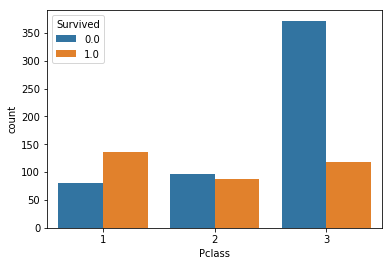

In [10]:
sns.countplot(data["Pclass"], hue=data["Survived"])

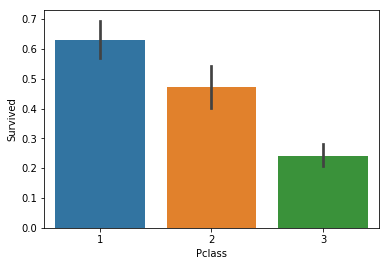

In [11]:
sns.barplot(x="Pclass", y="Survived", data=data) # 1號艙等生存率最高

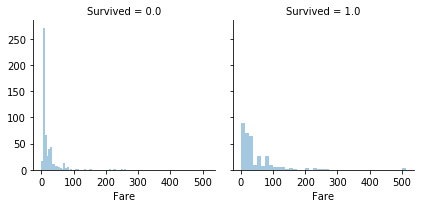

In [12]:
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, "Fare", kde=False)

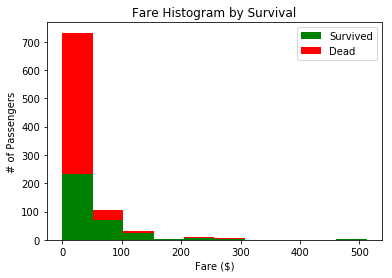

In [13]:
# 票價低的死亡率高
plt.hist(x = [data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

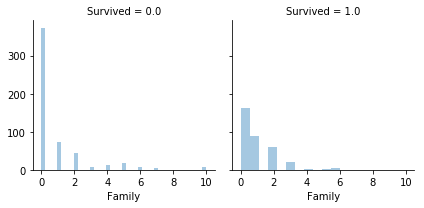

In [14]:
# 將"父母+小孩"加上"兄弟姊妹+丈夫妻子"的數量到新的欄位, 讓預測更準確
data["Family"] = data["Parch"] + data["SibSp"]
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, "Family", kde=False)

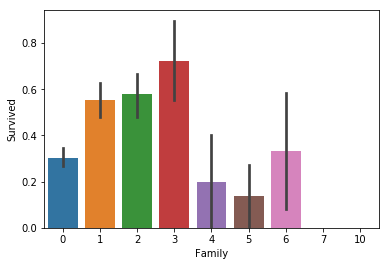

In [15]:
sns.barplot(x="Family", y="Survived", data=data)

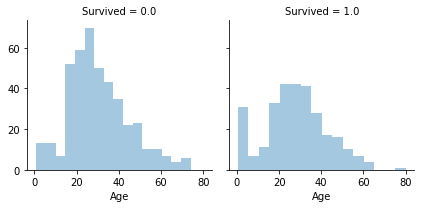

In [16]:
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, "Age", kde=False)

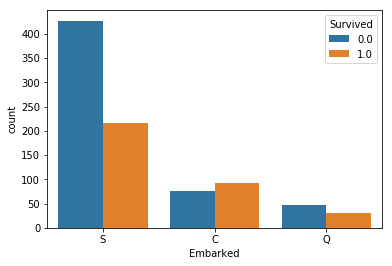

In [17]:
sns.countplot(data["Embarked"], hue=data["Survived"]) # S港口出發的死亡人數多

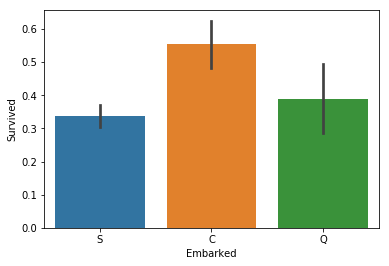

In [18]:
sns.barplot(x="Embarked", y="Survived", data=data)

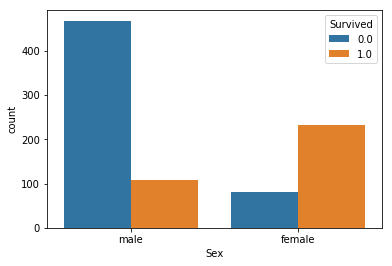

In [19]:
sns.countplot(data["Sex"], hue=data["Survived"]) # 女性生存率高

## 特徵工程(Feature Engineering)

In [20]:
freq_port = data["Embarked"].dropna().mode()[0] # S港口出現最多次
freq_port

'S'

In [21]:
data["Embarked"] = data["Embarked"].fillna(freq_port) # 用眾數補港口空值

In [22]:
# 用平均數補費用空值
data["Fare"].fillna(data["Fare"].dropna().median(), inplace=True)

In [23]:
# 取出姓名欄位中的稱謂, 增加準確度
data["Title"] = data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
pd.crosstab(data["Title"], data["Sex"]).T.style.background_gradient(cmap="summer_r")

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [24]:
data.groupby(["Title"])["Age"].mean().sort_values(ascending=True)

Title
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Ms          28.000000
Mr          32.252151
Countess    33.000000
Mrs         36.994118
Jonkheer    38.000000
Dona        39.000000
Don         40.000000
Rev         41.250000
Dr          43.571429
Lady        48.000000
Major       48.500000
Sir         49.000000
Col         54.000000
Capt        70.000000
Name: Age, dtype: float64

In [25]:
data["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [26]:
data["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Mme           1
Countess      1
Don           1
Dona          1
Sir           1
Capt          1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [27]:
# 將稱謂少於10的合併成"Rare"
stat_min = 10
rare_names = data["Title"].value_counts() < stat_min
data["Title"] = data["Title"].apply(lambda x: "Rare" if rare_names.loc[x]==True else x)
pd.crosstab(data["Title"], data["Sex"]).T.style.background_gradient(cmap="summer_r")

Title,Master,Miss,Mr,Mrs,Rare
Sex,,,,,
female,0,260,0,197,9
male,61,0,757,0,25


In [28]:
data["Title"] = data["Title"].fillna('0') # 填補空值
data = data.drop("Name", axis=1) # 取出稱謂後, 丟棄姓名欄位
data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family,Title
0,22.0,S,7.2500,0,1,3,male,1,0.0,1,Mr
1,38.0,C,71.2833,0,2,1,female,1,1.0,1,Mrs
2,26.0,S,7.9250,0,3,3,female,0,1.0,0,Miss
3,35.0,S,53.1000,0,4,1,female,1,1.0,1,Mrs
4,35.0,S,8.0500,0,5,3,male,0,0.0,0,Mr


In [29]:
data.loc[data["Family"]>0, "Family"] = 1 # 0: 無家庭, 1: 有家庭
data = data.drop(["SibSp", "Parch"], axis=1)
data.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Family,Title
0,22.0,S,7.2500,1,3,male,0.0,1,Mr
1,38.0,C,71.2833,2,1,female,1.0,1,Mrs
2,26.0,S,7.9250,3,3,female,1.0,0,Miss
3,35.0,S,53.1000,4,1,female,1.0,1,Mrs
4,35.0,S,8.0500,5,3,male,0.0,0,Mr


In [30]:
# 對類型特徵做編碼
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()
conv_vars = ["Embarked", "Sex", "Title"]
for col in conv_vars:
    data[col] = labelEnc.fit_transform(data[col])

data.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Family,Title
0,22.0,2,7.2500,1,3,1,0.0,1,2
1,38.0,0,71.2833,2,1,0,1.0,1,3
2,26.0,2,7.9250,3,3,0,1.0,0,1
3,35.0,2,53.1000,4,1,0,1.0,1,3
4,35.0,2,8.0500,5,3,1,0.0,0,2


## 使用隨機森林推測年齡(補空值)

In [31]:
data.corr()["Age"].sort_values(ascending=False)

Age            1.000000
Title          0.507413
Fare           0.177528
Sex            0.063645
PassengerId    0.028814
Survived      -0.077221
Embarked      -0.080195
Family        -0.128755
Pclass        -0.408106
Name: Age, dtype: float64

In [32]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(df):
    age_df = df[["Age", "Title", "Pclass"]]
    train = age_df.loc[df.Age.notnull()]
    test = age_df.loc[df.Age.isnull()]
    X = train.drop("Age", axis=1)
    y = train["Age"]
    rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictAges = rfr.predict(test.drop("Age", axis=1))
    df.loc[df.Age.isnull(), "Age"] = predictAges
    
    return df

data = fill_missing_age(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age            1309 non-null float64
Embarked       1309 non-null int32
Fare           1309 non-null float64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int32
Survived       891 non-null float64
Family         1309 non-null int64
Title          1309 non-null int32
dtypes: float64(3), int32(3), int64(3)
memory usage: 76.8 KB


In [33]:
#data["Age"].fillna(data["Age"].dropna().median(), inplace=True)

## 將年齡分成區間

In [34]:
'''
https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
'''
data["AgeBand"] = pd.cut(data["Age"].astype(int), 5)
data[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by="AgeBand", ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.548077
1,"(16.0, 32.0]",0.337398
2,"(32.0, 48.0]",0.409302
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


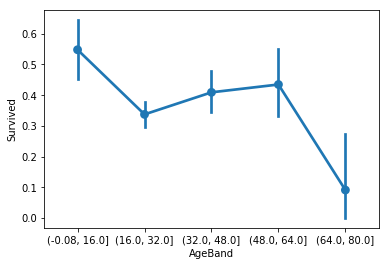

In [35]:
sns.pointplot(x="AgeBand", y="Survived",  data=data)

## 將費用分成區間

In [36]:
data["FareBand"] = pd.qcut(data["Fare"], 4)
data[["FareBand", "Survived"]].groupby(["FareBand"], as_index=False).mean().sort_values(by="FareBand", ascending=True)

,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.275]",0.441048
3,"(31.275, 512.329]",0.600000


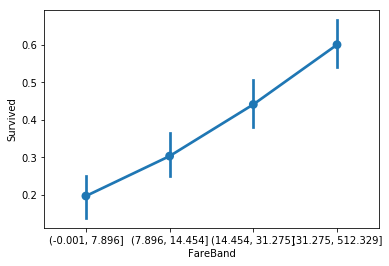

In [37]:
sns.pointplot(x="FareBand", y="Survived",  data=data)

In [38]:
data.drop(["Age", "Fare"], axis=1, inplace=True)
data.head()

,Embarked,PassengerId,Pclass,Sex,Survived,Family,Title,AgeBand,FareBand
0,2,1,3,1,0.0,1,2,"(16.0, 32.0]","(-0.001, 7.896]"
1,0,2,1,0,1.0,1,3,"(32.0, 48.0]","(31.275, 512.329]"
2,2,3,3,0,1.0,0,1,"(16.0, 32.0]","(7.896, 14.454]"
3,2,4,1,0,1.0,1,3,"(32.0, 48.0]","(31.275, 512.329]"
4,2,5,3,1,0.0,0,2,"(32.0, 48.0]","(7.896, 14.454]"


In [39]:
'''
# 數值標準化(縮放)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data[["Age", "Fare"]])
data[["Age", "Fare"]] = sc.transform(data[["Age", "Fare"]])
data.head()
'''

'\n# 數值標準化(縮放)\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nsc.fit(data[["Age", "Fare"]])\ndata[["Age", "Fare"]] = sc.transform(data[["Age", "Fare"]])\ndata.head()\n'

In [40]:
# 對類型特徵做編碼
labelEnc = LabelEncoder()
conv_vars = ["AgeBand", "FareBand"]
for col in conv_vars:
    data[col] = labelEnc.fit_transform(data[col])

data.head()

,Embarked,PassengerId,Pclass,Sex,Survived,Family,Title,AgeBand,FareBand
0,2,1,3,1,0.0,1,2,1,0
1,0,2,1,0,1.0,1,3,2,3
2,2,3,3,0,1.0,0,1,1,1
3,2,4,1,0,1.0,1,3,2,3
4,2,5,3,1,0.0,0,2,2,1


In [41]:
# 檢查資料狀況
print(data.info())
print('-'*40)
data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Embarked       1309 non-null int32
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int32
Survived       891 non-null float64
Family         1309 non-null int64
Title          1309 non-null int32
AgeBand        1309 non-null int32
FareBand       1309 non-null int32
dtypes: float64(1), int32(5), int64(3)
memory usage: 66.6 KB
None
----------------------------------------


,Embarked,PassengerId,Pclass,Sex,Survived,Family,Title,AgeBand,FareBand
count,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,1.493506,655.000000,2.294882,0.644003,0.383838,0.396486,1.910619,1.316272,1.486631
std,0.814244,378.020061,0.837836,0.478997,0.486592,0.489354,0.794930,0.809473,1.122135
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,328.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,2.000000,655.000000,3.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000
75%,2.000000,982.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,2.000000,1309.000000,3.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000


## 訓練、測試資料準備

In [42]:
# 將先前合併處裡完的資料分成訓練、測試資料
# train包含Survived資訊
train = data[pd.notnull(data["Survived"])].sort_values(by="PassengerId")
# test的Survived欄位為空值
test = data[pd.isnull(data["Survived"])].sort_values(by="PassengerId")
# 將train的Survived欄位數值轉為整數
train["Survived"] = train["Survived"].astype(int)

In [43]:
train.corr()["Survived"]

Embarked      -0.167675
PassengerId   -0.005007
Pclass        -0.338481
Sex           -0.543351
Survived       1.000000
Family         0.203367
Title         -0.052471
AgeBand       -0.039897
FareBand       0.306855
Name: Survived, dtype: float64

In [44]:
# 觀察各特徵與Survived的關係
for x in train:
    if (x!="PassengerId") and (x!="Survived"):
        print("Survival Correlation by:", x)
        print(train[[x, "Survived"]].groupby(x, as_index=False).mean())
        print('-'*40, '\n')

Survival Correlation by: Embarked
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009
---------------------------------------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------------------------------------- 

Survival Correlation by: Sex
   Sex  Survived
0    0  0.742038
1    1  0.188908
---------------------------------------- 

Survival Correlation by: Family
   Family  Survived
0       0  0.303538
1       1  0.505650
---------------------------------------- 

Survival Correlation by: Title
   Title  Survived
0      0  0.575000
1      1  0.697802
2      2  0.156673
3      3  0.792000
4      4  0.444444
---------------------------------------- 

Survival Correlation by: AgeBand
   AgeBand  Survived
0        0  0.548077
1        1  0.337398
2        2  0.409302
3        3  0.434783
4        4  0.090909
---------------------------------------- 

Survival Correlation by: FareBan

In [45]:
'''
# 分出訓練和測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train.drop("Survived", axis=1), train[["Survived"]], test_size=0.3, random_state=42)
'''

'\n# 分出訓練和測試資料\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(\n    train.drop("Survived", axis=1), train[["Survived"]], test_size=0.3, random_state=42)\n'

In [46]:
train = train.drop("PassengerId", axis=1)
# test保留PassengerId以便最後製作上傳檔案
test = test.drop("Survived", axis=1)

In [47]:
# 訓練資料
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

## 演算法比較

In [48]:
from sklearn import discriminant_analysis, ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree
from sklearn import model_selection
from xgboost import XGBClassifier
# Machine Learning Algorithm
# n_jobs=-1, 使用所有核心做平行處理(fit & predict)
MLA = [
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_estimators=100, n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(n_jobs=-1),
    
    # Generalized Linear Model(GLM)
    linear_model.LogisticRegression(solver='liblinear'),
    linear_model.PassiveAggressiveClassifier(max_iter=1000, tol=1e-3, n_jobs=-1),
    linear_model.Perceptron(max_iter=1000, tol=1e-3, n_jobs=-1),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(max_iter=1000, n_jobs=-1),
    
    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors=3, n_jobs=-1),
    
    # SVM
    svm.LinearSVC(max_iter=3000),
    svm.NuSVC(gamma='auto', probability=True),
    svm.SVC(gamma='auto', probability=True),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # xgboost
    XGBClassifier(n_jobs=-1)
]

# 分割資料準備給之後的交叉驗證(cross-validation)
# ShuffleSplit is an alternative to train_test_split
# run model 10x with 60/30 split intentionally leaving out 10%
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.6, random_state=42)

# create table to compare MLA metrics
MLA_columns = ["Name", "Parameters", "Train Accuracy Mean", "Test Accuracy Mean",
              "Test Accuracy 3*STD", "Time"]
MLA_compare = pd.DataFrame(columns=MLA_columns)
#MLA_predict = y_train

# 依序使用各個演算法並記錄相關資訊
row_index = 0
for alg in MLA:
    # 演算法名稱與參數
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, "Name"] = MLA_name
    MLA_compare.loc[row_index, "Parameters"] = str(alg.get_params())
    
    # 交叉驗證
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv=cv_split, n_jobs=-1, return_train_score=True)
    
    MLA_compare.loc[row_index, "Time"] = cv_results["fit_time"].mean()
    MLA_compare.loc[row_index, "Train Accuracy Mean"] = cv_results["train_score"].mean()
    MLA_compare.loc[row_index, "Test Accuracy Mean"] = cv_results["test_score"].mean()
    # 了解最差情形
    MLA_compare.loc[row_index, "Test Accuracy 3*STD"] = cv_results["test_score"].std()*3
    
    alg.fit(X_train, y_train)
    #MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index += 1

# 演算法比較
MLA_compare.sort_values(by="Test Accuracy Mean", ascending=False, inplace=True)
MLA_compare

,Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy 3*STD,Time
18,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.826217,0.81791,0.0612713,0.0443254
17,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.825094,0.816418,0.0602401,0.0611181
5,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.857678,0.815672,0.0734383,0.084941
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.847566,0.812687,0.0652334,0.548034
6,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.876217,0.810075,0.086194,0.165547
3,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.872659,0.80709,0.0666115,0.109472
19,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.876217,0.806343,0.0930452,0.00253868
4,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.876217,0.80597,0.0843647,0.169207
7,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.854869,0.803731,0.0734383,0.680754
20,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.876217,0.801493,0.10097,0.00253844


Text(0, 0.5, 'Algorithm')

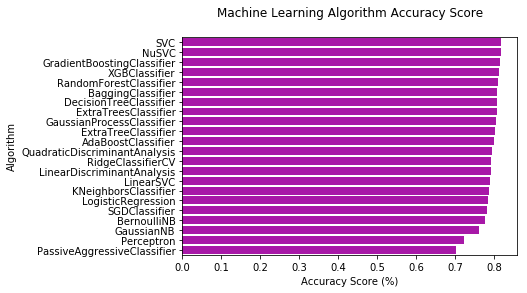

In [49]:
# 圖表形式
sns.barplot(x="Test Accuracy Mean", y="Name", data=MLA_compare, color='m')
plt.title("Machine Learning Algorithm Accuracy Score\n")
plt.xlabel("Accuracy Score (%)")
plt.ylabel("Algorithm")

## 以隨機森林為基底做調整(Tune Model)

In [50]:
# 原始模型
forest = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
base_results = model_selection.cross_validate(forest, X_train, y_train, n_jobs=-1, cv=cv_split, return_train_score=True)
forest.fit(X_train, y_train)
print("Before")
print("Forest Parameters:", forest.get_params())
print("Forest Training w/bin score mean: {:.2f}". format(base_results["train_score"].mean()*100))
print("Forest Test w/bin score mean: {:.2f}". format(base_results["test_score"].mean()*100))
print("Forest Test w/bin score 3*std: +/- {:.2f}". format(base_results["test_score"].std()*100*3))

Before
Forest Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Forest Training w/bin score mean: 87.62
Forest Test w/bin score mean: 81.75
Forest Test w/bin score 3*std: +/- 8.17


In [51]:
# ParameterGrid
param_grid = {"n_estimators":[60,100],
              "criterion":["gini", "entropy"],
              "max_depth":[2,4,6,8,10,None],
              "min_samples_split":[2,5,10],
              "min_samples_leaf":[1,5,10],
              "n_jobs":[-1],
              "random_state":[42]}
# 用GridSearchCV找出最好的模型
tune_model = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid=param_grid, scoring="roc_auc", n_jobs=-1, cv=cv_split, return_train_score=True)
tune_model.fit(X_train, y_train)

print("After")
# 找到最好的參數
print("Forest Parameters:", tune_model.best_params_)
print("Forest Training w/bin score mean: {:.2f}". format(tune_model.cv_results_["mean_train_score"][tune_model.best_index_]*100))
print("Forest Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("Forest Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

After
Forest Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
Forest Training w/bin score mean: 89.05
Forest Test w/bin score mean: 87.26
Forest Test w/bin score 3*std: +/- 5.78


## 找出適當的特徵(Tune Model with Feature Selection)

In [52]:
# 原始模型
print("Before RFE")
print("Forest Training Shape Old:", X_train.shape)
print("Forest Training Columns Old:", X_train.columns.values)
print("Forest Training w/bin score mean: {:.2f}". format(base_results["train_score"].mean()*100))
print("Forest Test w/bin score mean: {:.2f}". format(base_results["test_score"].mean()*100))
print("Forest Test w/bin score 3*std: +/- {:.2f}". format(base_results["test_score"].std()*100*3))

Before RFE
Forest Training Shape Old: (891, 7)
Forest Training Columns Old: ['Embarked' 'Pclass' 'Sex' 'Family' 'Title' 'AgeBand' 'FareBand']
Forest Training w/bin score mean: 87.62
Forest Test w/bin score mean: 81.75
Forest Test w/bin score 3*std: +/- 8.17


In [53]:
# 特徵選擇
# recursive feature elimination(RFE) with cross validation (CV)
from sklearn import feature_selection
forest_rfe = feature_selection.RFECV(forest, step=1, scoring="accuracy", cv=cv_split, n_jobs=-1)
forest_rfe.fit(X_train, y_train)

# can use pipeline to reduce fit and transform steps
# http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

# 較適當的特徵
X_rfe = X_train.columns.values[forest_rfe.get_support()]
# 訓練新的模型
rfe_result = model_selection.cross_validate(forest, X_train[X_rfe], y_train, n_jobs=-1, cv=cv_split, return_train_score=True)

print("After RFE")
print("Forest Training Shape New:", X_train[X_rfe].shape)
print("Forest Training Columns New:", X_rfe)
print("Forest Training w/bin score mean: {:.2f}". format(rfe_result["train_score"].mean()*100))
print("Forest Test w/bin score mean: {:.2f}". format(rfe_result["test_score"].mean()*100))
print("Forest Test w/bin score 3*std: +/- {:.2f}". format(rfe_result["test_score"].std()*100*3))

After RFE
Forest Training Shape New: (891, 5)
Forest Training Columns New: ['Pclass' 'Sex' 'Title' 'AgeBand' 'FareBand']
Forest Training w/bin score mean: 84.98
Forest Test w/bin score mean: 81.79
Forest Test w/bin score 3*std: +/- 5.22


In [54]:
# 調整新的模型
rfe_tune_model = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid=param_grid, scoring="roc_auc", n_jobs=-1, cv=cv_split, return_train_score=True)
rfe_tune_model.fit(X_train[X_rfe], y_train)
print("After RFE Tuned")
# 找到最好的參數
print("Forest Parameters:", rfe_tune_model.best_params_)
print("Forest Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_["mean_train_score"][rfe_tune_model.best_index_]*100))
print("Forest Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]*100))
print("Forest Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*100*3))

After RFE Tuned
Forest Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 60, 'n_jobs': -1, 'random_state': 42}
Forest Training w/bin score mean: 89.62
Forest Test w/bin score mean: 87.15
Forest Test w/bin score 3*std: +/- 6.40


In [55]:
'''
# 投票
from sklearn.ensemble import VotingClassifier
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "Title", "Family"]
alg = VotingClassifier(estimators=[
    ('random_forest', random_forest), ('decision_tree', decision_tree), ('gb', gb)],
                       voting='soft', n_jobs=-1)
alg = alg.fit(X_train, y_train)
acc_alg = alg.score(X_train, y_train)
acc_alg
'''

'\n# 投票\nfrom sklearn.ensemble import VotingClassifier\npredictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "Title", "Family"]\nalg = VotingClassifier(estimators=[\n    (\'random_forest\', random_forest), (\'decision_tree\', decision_tree), (\'gb\', gb)],\n                       voting=\'soft\', n_jobs=-1)\nalg = alg.fit(X_train, y_train)\nacc_alg = alg.score(X_train, y_train)\nacc_alg\n'

In [56]:
# 測試資料
X_test = test.drop(["PassengerId", "Embarked", "Family"], axis=1).copy()

# 預測
y_pred = rfe_tune_model.predict(X_test)
# 將結果轉為整數
y_pred = y_pred.astype(int)

In [57]:
# 製作上傳檔案
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred
})
submission.to_csv("submit.csv", index=False)
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int32
dtypes: int32(1), int64(1)
memory usage: 8.2 KB
